In [226]:
import pandas as pd
import numpy as np
import scipy
from scipy import stats
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns; 
sns.set()


In [4]:
train = pd.read_csv('./data/train.csv', index_col = 'Id')
test = pd.read_csv('./data/test.csv', index_col = 'Id')

In [5]:
df1 = train.copy()
df2 = test.copy()

In [6]:
df1['SalePrice'].count()

1460

In [7]:
df1.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
sum(df1.dtypes == object)

43

In [9]:
## LOOK AT THIS
print(df1.columns[0:22]) # hyelee 
print(df1.columns[22:41]) # alyssa
print(df1.columns[41:57]) # kisoo
print(df1.columns[57:]) # wonchan

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl'],
      dtype='object')
Index(['Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir'],
      dtype='object')
Index(['Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'FireplaceQu'],
      dtype='object')
Index(['GarageType', 'GarageYrBlt', 'GarageFinish', 'Gar

In [10]:
df1.isnull().sum().sort_values(ascending = False).head(19)
# probably take out poolQC and MiscFeature

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageCond        81
GarageFinish      81
GarageQual        81
GarageYrBlt       81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [11]:
df1[df1.PoolQC.isnull() == 0] # only 7 rows and probably could say pool or no pool since they are about same quality

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
198,75,RL,174.0,25419,Pave,NaN,Reg,Lvl,AllPub,Corner,...,512,Ex,GdPrv,NaN,0,3,2006,WD,Abnorml,235000
811,20,RL,78.0,10140,Pave,NaN,Reg,Lvl,AllPub,Inside,...,648,Fa,GdPrv,NaN,0,1,2006,WD,Normal,181000
1171,80,RL,76.0,9880,Pave,NaN,Reg,Lvl,AllPub,Inside,...,576,Gd,GdPrv,NaN,0,7,2008,WD,Normal,171000
1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,Corner,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000
1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
1387,60,RL,80.0,16692,Pave,NaN,IR1,Lvl,AllPub,Inside,...,519,Fa,MnPrv,TenC,2000,7,2006,WD,Normal,250000
1424,80,RL,NaN,19690,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,738,Gd,GdPrv,NaN,0,8,2006,WD,Alloca,274970


In [12]:
df1.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [154]:
df1_part1 = df1.iloc[:, 0:22]
df1_part1 = df1_part1.merge(df1['SalePrice'], how="inner", on='Id')
df1_part1.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,250000
6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,143000
7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,307000
8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,200000
9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,129900


In [15]:
df1_part1.isnull().sum()
# Alley : convert NaN => NA
# LotFrontage : convert NaN => ???? 

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
Alley           1369
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
dtype: int64

In [213]:
## Alley : convert NaN => NO 
df1_part1['Alley'].fillna('NA',inplace=True)



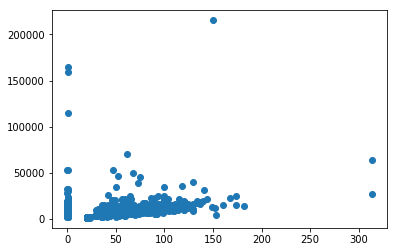

(1411, 23)

In [131]:
# <CASE 1> correlation LotArea vs LotFrontage
df_tmp = df1_part1[~df1_part1.LotFrontage.isnull()]
plt.scatter(df_tmp.LotFrontage ,df_tmp.LotArea)
plt.show()
df_tmp.shape 

In [99]:
np.corrcoef(df_tmp.LotArea, df_tmp.LotFrontage)

array([[1.        , 0.57377437],
       [0.57377437, 1.        ]])

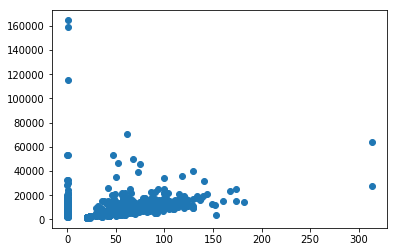

In [133]:
# delete outlier 
outlier_idx = df_tmp[df_tmp["LotArea"] == df_tmp["LotArea"].max()].index
df_tmp = df_tmp.drop(outlier_idx)                   
                     
df_tmp.shape
df_tmp2 = df_tmp
plt.scatter(df_tmp.LotFrontage ,df_tmp.LotArea)
plt.show()

In [126]:
#<CASE 1> fill null value 
print(df_tmp['LotArea'].mean())
print(df_tmp['LotFrontage'].mean())
print(df_tmp['LotFrontage'].mean()/df_tmp['LotArea'].mean()) 

#df1_part1['LotFrontage'].fillna(df_tmp['LotFrontage'] *0.007206024910841549 ,inplace=True)

9647.947368421053
69.8061821219716
0.007235340270455457


In [127]:
np.corrcoef(df_tmp.LotArea, df_tmp.LotFrontage)

array([[1.       , 0.5595072],
       [0.5595072, 1.       ]])

In [128]:
# <CASE 2> correlation Neighborhood median vs LotFrontage
df_md_lotfrontage = df_tmp.groupby('Neighborhood').agg('median')[{'LotFrontage'}]
df_md_lotfrontage = df_md_lotfrontage.rename(columns={"LotFrontage" : "mdLotFrontage"})
df_md_lotfrontage
#df.rename(columns={"A": "a", "B": "c"})

,mdLotFrontage
Neighborhood,
Blmngtn,43.0
Blueste,24.0
BrDale,21.0
BrkSide,52.0
ClearCr,80.0
CollgCr,70.0
Crawfor,74.0
Edwards,65.0
Gilbert,65.0


In [135]:
df_tmp2 = df_tmp2.merge(df_md_lotfrontage, how="inner", on='Neighborhood')

#df_tmp.loc[:,('Neighborhood','mdLotFrontage')]
np.corrcoef(df_tmp2.mdLotFrontage, df_tmp2.LotFrontage)

array([[1.        , 0.23895725],
       [0.23895725, 1.        ]])

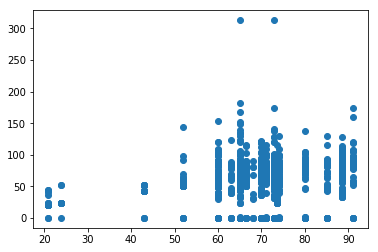

In [136]:
plt.scatter(df_tmp2.mdLotFrontage ,df_tmp2.LotFrontage)
plt.show()

In [96]:
np.corrcoef(df_tmp.LotFrontage, df_tmp.SalePrice)

array([[1.        , 0.34831535],
       [0.34831535, 1.        ]])

In [158]:
#<CASE 2> fill null value 
#df1_part1['LotFrontage'].fillna(df_tmp['mdLotFrontage']  ,inplace=True)

#pd.concat([df1_part1, df_md_lotfrontage], axis=1) 
df1_part1 = pd.concat([df1_part1.reset_index().set_index('Neighborhood'),df_md_lotfrontage], axis=1, join='inner').reset_index().set_index('Id')


In [170]:
#df1_part1['LotFrontage'].fillna(df1_part1['mdLotFrontage']  ,inplace=True)
df1_part1 = df1_part1.drop(columns=['mdLotFrontage'])

In [212]:
df1_part1_num_features=df1_part1.select_dtypes(include=['int64','float64'])
#df1_part1_categorical_features=df1_part1.select_dtypes(include='object')
df1_part1_categorical_features = df1_part1.drop(columns=['LotFrontage','LotArea','YearBuilt','YearRemodAdd'])


In [201]:
df1_part1_num_features = df1_part1_num_features.drop(columns=['MSSubClass','OverallQual','OverallCond'])

In [202]:
df1_part1_num_features.describe()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.202055,10516.828082,1971.267808,1984.865753,180921.195890
std,22.430685,9981.264932,30.202904,20.645407,79442.502883
min,21.000000,1300.000000,1872.000000,1950.000000,34900.000000
25%,60.000000,7553.500000,1954.000000,1967.000000,129975.000000
50%,70.000000,9478.500000,1973.000000,1994.000000,163000.000000
75%,80.000000,11601.500000,2000.000000,2004.000000,214000.000000
max,313.000000,215245.000000,2010.000000,2010.000000,755000.000000


In [211]:
df1_part1_categorical_features.head(5)

,Neighborhood,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,SalePrice
Id,,,,,,,,,,,,,,,,,,,
1,CollgCr,60,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,208500
2,Veenker,20,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,181500
3,CollgCr,60,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,223500
4,Crawfor,70,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,140000
5,NoRidge,60,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,250000


In [204]:
df1_part1_num_features.corr()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,SalePrice
LotFrontage,1.000000,0.335836,0.121180,0.084711,0.350059
LotArea,0.335836,1.000000,0.014228,0.013788,0.263843
YearBuilt,0.121180,0.014228,1.000000,0.592855,0.522897
YearRemodAdd,0.084711,0.013788,0.592855,1.000000,0.507101
SalePrice,0.350059,0.263843,0.522897,0.507101,1.000000


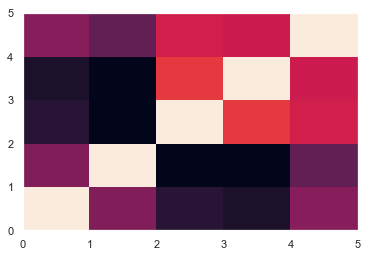

In [208]:
from matplotlib import pyplot as plt
heatmap = plt.pcolor(df1_part1_num_features.corr())

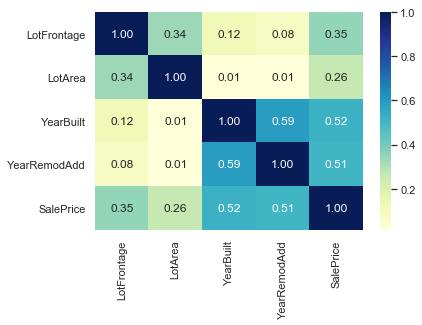

In [207]:
import seaborn as sns; 
sns.set()

#ax = sns.heatmap(df1_part1.corr())
ax = sns.heatmap(df1_part1_num_features.corr(), cmap="YlGnBu", annot=True, fmt=".2f")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1b6595c0>,
      dtype=object)

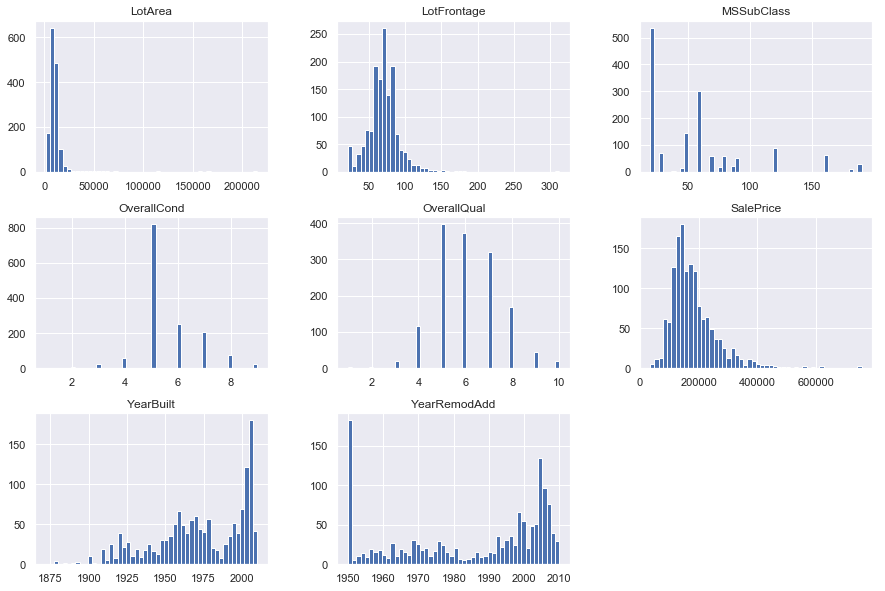

In [216]:
df1_part1_num_features.hist(bins=50, figsize=(15,10))

In [242]:
#### Categorical Value  
#obs = np.array([[10, 10, 20], [20, 20, 20]])
#chi2_contingency(obs)
#stats.chi2_contingency([[10, 10, 20], [20, 20, 20]])
#stats.chi2_contingency([[208500, 181500, 223500],['2Story', '1Story', '2Story']])
#df1_part1_num_features.SalePrice.to_numpy()
#[df1_part1_num_features.SalePrice.to_numpy(),df1_part1_categorical_features.HouseStyle.to_numpy()]
X = df1_part1_num_features.SalePrice
Y = df1_part1_categorical_features.HouseStyle
#pd.crosstab(X,Y)

stats.chi2_contingency(pd.crosstab(X,Y))

(4596.789414569782,
 0.6482615179447816,
 4634,
 array([[0.10547945, 0.00958904, 0.49726027, ..., 0.30479452, 0.02534247,
         0.04452055],
        [0.10547945, 0.00958904, 0.49726027, ..., 0.30479452, 0.02534247,
         0.04452055],
        [0.10547945, 0.00958904, 0.49726027, ..., 0.30479452, 0.02534247,
         0.04452055],
        ...,
        [0.10547945, 0.00958904, 0.49726027, ..., 0.30479452, 0.02534247,
         0.04452055],
        [0.10547945, 0.00958904, 0.49726027, ..., 0.30479452, 0.02534247,
         0.04452055],
        [0.10547945, 0.00958904, 0.49726027, ..., 0.30479452, 0.02534247,
         0.04452055]]))